<div align="center">
    <h1>Regression Gone Wrong</h1>
    <h2>@maxhumber</h2>
    <h4>Boston • ODSC • May 2, 2019</h4>
</div>

<div align="center">
    <img src="images/ymxb.png" height="600" width="600">
</div>

<div align="center">
    <img src="images/datalol.png" height="500" width="500">
</div>

<div align="center">
    <img src="images/titanic.jpg" height="500" width="500">
</div>

<div align="center">
    <img src="images/hockey_clipart.jpg" height="500" width="500">
</div>

<div align="center">
    <img src="images/toronto.jpg" height="800" width="800">
</div>

<div align="center">
    <img src="images/bruins.jpg" height="700" width="700">
</div>

<div align="center">
    <img src="images/leafs_ice.jpg" height="600" width="600">
</div>

<div align="center">
    <b><font size="+10">Regression 101</font></b>
</div>

In [1]:
# step 1:
import pandas as pd

In [2]:
# step 2 - drop NAs:
df = pd.read_csv('data/skaters.csv')
columns = ['name', 'age', 'position', 'goals', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']
df = df[columns].dropna()

In [3]:
from IPython.core.display import HTML

HTML(df.sample(5).to_html(
    index=False,
    classes='table table-responsive table-striped table-bordered'
))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
Radko Gudas,23.0,D,3,19,2,114,138.0,273.0
Craig Smith,27.0,C,12,17,7,155,16.0,93.0
Justin Braun,28.0,D,4,19,11,114,140.0,95.0
Derick Brassard,28.0,C,27,31,12,182,23.0,103.0
Brandon Pirri,22.0,C,13,12,6,80,15.0,24.0


In [4]:
# step 3 - target:
y = df['goals']
X = df[['age', 'assists', 'plus_minus', 'shots_on_goal', 'blocks', 'hits']]

In [5]:
# step 4:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1993)

In [6]:
# step 5:
from sklearn.linear_model import LinearRegression

In [7]:
# step 6:
model = LinearRegression()

In [8]:
# step 7:
model.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [9]:
# step 8:
y_hat = model.predict(X_test)

In [10]:
# step 9:
from sklearn.metrics import r2_score, mean_absolute_error
print(f'R^2: {r2_score(y_test, y_hat):.2f}')
print(f'MAE: {mean_absolute_error(y_test, y_hat):.2f}')

R^2: 0.81
MAE: 2.96


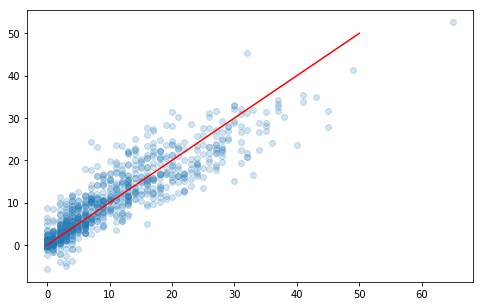

In [13]:
from matplotlib import pyplot as plt
%matplotlib inline

plt.figure(figsize=(8, 5))
plt.scatter(y_test, y_hat, alpha=1/5)
plt.plot([0, 50], [0, 50], c='r');

In [15]:
HTML(df.sample(5).to_html(
    index=False,
    classes='table table-responsive table-striped table-bordered'
))

name,age,position,goals,assists,plus_minus,shots_on_goal,blocks,hits
Corban Knight,28.0,C,1,3,-5,15,13.0,9.0
Zdeno Chara,38.0,D,9,28,12,158,123.0,134.0
Rourke Chartier,22.0,C,1,0,-5,19,3.0,14.0
Rasmus Ristolainen,20.0,D,8,12,-32,121,136.0,118.0
David Krejci,21.0,C,6,21,-3,73,27.0,47.0


<h1>My model...</h1>
<ol>
    <li>can't accept new data...</li>
    <li>isn't benchmarked...</li>
    <li><i>maybe</i> isn't using the right algorithm...</li>
</ol>

<div align="center">
    <img src="https://media.giphy.com/media/Bw7fyRylzteWk/giphy.gif" height="600" width="600">
</div>

<br>
<div align="center">
    <b><font size="+10">#YouSuckAtRegression</font></b>
</div>
<br>
<div align="center">
    <img src="https://i.imgur.com/GfJNU68.gif" height="600" width="600">
</div>

<h1>Models</h1>
<ol>
    <li>Multiple Output Regression...</li>
    <li>Ordinal Regression...</li>
    <li>Poisson Regression...</li>
</ol>

<h1>Problems</h1>
<ol>
    <li>...Next Year</li>
    <li>...Diamonds in the Rough</li>
    <li>...Over/Under</li>
</ol>

![](images/fantasy_settings.png)

![](images/nhl_blotto.png)

![](images/adp.png)

In [ ]:
import pandas as pd

CATEGORIES = [
    'goals',
    'assists',
    'plus_minus',
    'powerplay_points',
    'shots_on_goal',
    'hits',
    'blocks',
    'wins',
    'goals_against_average',
    'saves',
    'save_percentage',
    'shutouts'
]

raw = pd.read_csv('data/nhl_draft_2018.csv')
df = raw.copy()

In [ ]:
import numpy as np 

np.random.seed(1)
df.sample(10)

In [ ]:
from sklearn.model_selection import train_test_split 

target = 'adp'

y = df[target].values
X = df.drop(target, axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [ ]:
from sklearn.preprocessing import LabelBinarizer, StandardScaler
from sklearn_pandas import DataFrameMapper

mapper = DataFrameMapper([
    ('position', LabelBinarizer()),
    (['goals'], StandardScaler()),
    (['assists'], StandardScaler()),
    (['plus_minus'], StandardScaler()),
    (['powerplay_points'], StandardScaler()),
    (['shots_on_goal'], StandardScaler()),
    (['hits'], StandardScaler()),
    (['blocks'], StandardScaler()),
    (['wins'], StandardScaler()),
    (['goals_against_average'], StandardScaler()),
    (['saves'], StandardScaler()),
    (['save_percentage'], StandardScaler()),
    (['shutouts'], StandardScaler())
], df_out=True)

X_train = mapper.fit_transform(X_train)
X_test = mapper.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()

lr.fit(X_train, y_train)

lr.predict(X_test)[:10]

# 🙅🏻‍♀️

In [ ]:
#!pip install mord

import mord

model = mord.OrdinalRidge(fit_intercept=False)

model.fit(X_train, y_train)

model.predict(X_test)[:5]

In [ ]:
compare = pd.DataFrame({
    'true': y_test,
    'pred': model.predict(X_test)
})

compare.head()

In [ ]:
import altair as alt
alt.renderers.enable('notebook')

(
    alt.Chart(compare)
    .mark_point()
    .encode(
        x='true', 
        y='pred'
    )
)

In [ ]:
from sklearn.metrics import r2_score

r2_score(compare['true'], compare['pred'])

In [ ]:
bias = pd.DataFrame({
    'feature': mapper.transformed_names_,
    'coef': model.coef_
}).sort_values('coef')

bias = bias[~bias.feature.str.contains('position')]

In [ ]:
bias

> Underdogs can change the odds of winning simply by changing the basis of competition.

[Source](https://fs.blog/2010/07/colonel-blotto-game/)

![](images/nhl_blotto.png)

In [ ]:
df.head()

In [ ]:
# GAA is a bad thing, need to reverse
df['goals_against_average'] = -df['goals_against_average']

df[CATEGORIES] = (
    df
    [CATEGORIES]
    .apply(lambda x: (x - x.min()) / (x.max() - x.min()))
)

In [ ]:
df.head()

In [ ]:
def blotto(x, out_range=[0.80, 1]):
    domain = np.min(x), np.max(x)
    y = (x - (domain[1] + domain[0]) / 2) / (domain[1] - domain[0])
    return y * (out_range[1] - out_range[0]) + (out_range[1] + out_range[0]) / 2

bias['mod'] = bias[['coef']].apply(lambda x: blotto(x, (0.8, 1)))
bias = bias[['feature', 'mod']].set_index('feature').iloc[:,0]

bias

In [ ]:
df[list(bias.keys())] *= bias

df.head()

In [ ]:
from copy import deepcopy

cats = deepcopy(CATEGORIES)

cats.remove('goals')
cats.remove('shutouts')

df['score'] = df[cats].sum(axis=1)

df[['name', 'position', 'score']].head(10)

![](images/fantasy_settings.png)

In [ ]:
starters = {'C': 2, 'LW': 2, 'RW': 2, 'D': 4, 'G': 2}

players = sum(starters.values())
skaters = sum([value for key, value in starters.items() if key != 'G'])
goalies = players - skaters

print(skaters)
print(goalies)

In [ ]:
# df['score'] = df['score'] / players
df['score'] = np.where(df['position'] == 'G', df['score'] / goalies, df['score'] / skaters)

df[['name', 'position', 'score']].head()

In [ ]:
raw.groupby('position').mean()

In [ ]:
pool_size = 10

for position, slots in starters.items():
    replacement = (
        df[df['position'] == position]
        .sort_values('score', ascending=False)
        .head(slots * pool_size)
        ['score']
        .mean()
    )
    df.loc[df['position'] == position, 'score'] = df['score'] - replacement

In [ ]:
df[['name', 'position', 'score']].sort_values('score', ascending=False).head()

In [ ]:
scale = blotto

df['score'] = df[['score']].apply(lambda x: scale(x, (0, 1)))
df['my_rank'] = df['score'].rank(method='average', ascending=False)
df = df.sort_values('my_rank')

In [ ]:
df['position_rank'] = df.groupby(['position'])['score'].rank(ascending=False)
df['arbitrage'] = df['adp'] - df['my_rank']

In [ ]:
df[['name', 'position', 'score', 'adp', 'my_rank', 'position_rank', 'arbitrage']].head()

![](images/draft.png)

![](images/my_draft.png)

![](images/afterdraft.png)

![](images/lastweek.png)

![](https://media.giphy.com/media/lD76yTC5zxZPG/giphy.gif)

<div align="center">

    twitter: @maxhumber
    linkedin: /in/maxhumber
    email: maxhumber@gmail.com

</div>